In [ ]:

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading my data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#using the apply method with lambda to get data if not nall values 

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
#gettng data for the top 5 rows for the selected clomuns
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [ ]:
#using the explode method to duplicat evalues
df_exploded = df.explode('job_skills')


In [ ]:
df_exploded

<Axes: xlabel='job_skills'>

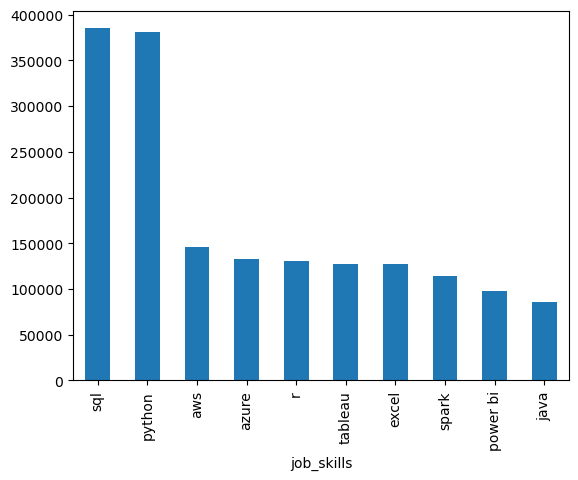

In [8]:
#applying value count on the explode function for the top 10 and ploting them as barchart
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [10]:
#grouping both columns by size using groupby
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()

#checking data type

type(skills_count)


pandas.core.series.Series

In [15]:
#converting it into a dataframe

df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count

#sorting our data in dscending order
df_skills_count = df_skills_count.sort_values(by='skills_count', ascending= False)
df_skills_count

,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [16]:
#filtering for data analyst and for top 10 skills

job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final



,job_skills,job_title_short,skills_count
1821,sql,Data Analyst,92428
558,excel,Data Analyst,66860
1478,python,Data Analyst,57190
1941,tableau,Data Analyst,46455
1410,power bi,Data Analyst,39380
1516,r,Data Analyst,29996
1635,sas,Data Analyst,27998
1429,powerpoint,Data Analyst,13822
2198,word,Data Analyst,13562
1625,sap,Data Analyst,11280


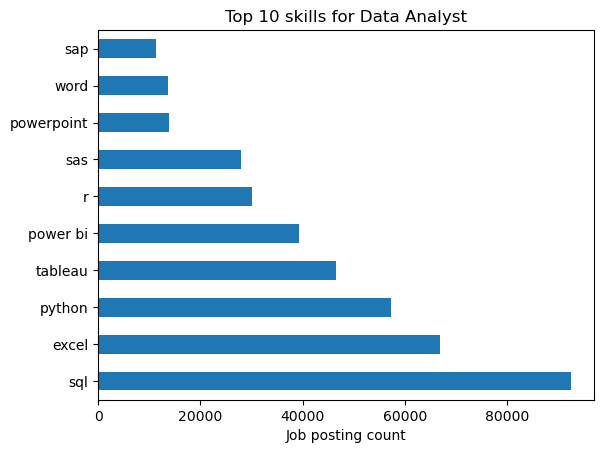

In [24]:
#ploting our data for x to be job_skills and y to be skills_count

df_skill_final.plot(kind='barh', x='job_skills', y='skills_count')

#inverting the way axis using the gca and invert method

plt.gca().invert_yaxis

#setting tittle

plt.title(f"Top {top_skills} skills for {job_title}")
#setting the x label 

plt.xlabel('Job posting count')

#no need for y labe

plt.ylabel('')

#removing the skills_count icon 
plt.legend().set_visible(False)

plt.show()